# Convolutional Neural Networks

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# Attach google drive

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Function to save numpy array and rest of other columns seperately and then brings them together for later use

def create_df(np_path, df_path):

  loaded_np = np.load(np_path, allow_pickle=True) # Load numpy arrays
  df_exported = pd.read_csv(df_path) # Read in rest of dataframe
  df_exported['melspecs'] = loaded_np # Merge

  return df_exported

In [ ]:
np_path = '/content/gdrive/MyDrive/Music-Genre-Project/melspecs/data.npy'
df_path = '/content/gdrive/MyDrive/Music-Genre-Project/melspecs/df.csv'

In [ ]:
df = create_df(np_path, df_path)
df.head()

,file_name,genre,genre_num,melspecs
0,/content/gdrive/MyDrive/Music-Genre-Project/ge...,blues,0,"[[-21.381990674164236, -26.59064856269263, -32..."
1,/content/gdrive/MyDrive/Music-Genre-Project/ge...,blues,0,"[[-24.882997729703842, -29.4209843264114, -37...."
2,/content/gdrive/MyDrive/Music-Genre-Project/ge...,blues,0,"[[-36.865174054353496, -42.8580202940706, -73...."
3,/content/gdrive/MyDrive/Music-Genre-Project/ge...,blues,0,"[[-23.014353611424642, -24.69549568481796, -26..."
4,/content/gdrive/MyDrive/Music-Genre-Project/ge...,blues,0,"[[-26.309496111579065, -29.813054506919347, -2..."


In [ ]:
# Reshaping mel-spectrograms to be suitable for CNN

X = np.concatenate(np.array(df['melspecs'])).reshape(df['melspecs'].shape[0], 128, 130, 1)
y = df['genre_num']

# Standardize X
X /= 255

# one hot encode y
y = to_categorical(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Construct the architecture

# Instantiate

cnn_model = Sequential()

# Conv layer
cnn_model.add(Conv2D(filters=16,
                    kernel_size=(3, 3),
                    padding='same',
                    activation='relu',
                    input_shape=(128, 130, 1)))

# Max pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))

# Max pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    padding='same',
                    activation='relu'))

# Max pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model.add(Conv2D(filters=128,
                    padding='same',
                    kernel_size=(3,3),
                    activation='relu'))

# Max pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model.add(Conv2D(filters=64,
                    padding='same',
                    kernel_size=(3,3),
                    activation='relu'))

# Max pooling
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten
cnn_model.add(Flatten())

# Dense
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))

# Outer layer
cnn_model.add(Dense(10, activation='softmax'))

# Compile
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
model_history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 12s 251ms/step - loss: 2.2969 - acc: 0.1232 - val_loss: 2.2177 - val_acc: 0.1550
Epoch 2/100
16/16 [==============================] - 2s 141ms/step - loss: 2.1677 - acc: 0.2089 - val_loss: 2.0073 - val_acc: 0.2540
Epoch 3/100
16/16 [==============================] - 2s 140ms/step - loss: 1.9624 - acc: 0.2830 - val_loss: 1.8461 - val_acc: 0.3245
Epoch 4/100
16/16 [==============================] - 2s 143ms/step - loss: 1.8148 - acc: 0.3409 - val_loss: 1.7207 - val_acc: 0.3830
Epoch 5/100
16/16 [==============================] - 2s 140ms/step - loss: 1.7194 - acc: 0.3785 - val_loss: 1.6159 - val_acc: 0.4210
Epoch 6/100
16/16 [==============================] - 2s 142ms/step - loss: 1.5980 - acc: 0.4148 - val_loss: 1.5167 - val_acc: 0.4640
Epoch 7/100
16/16 [==============================] - 2s 142ms/step - loss: 1.4906 - acc: 0.4594 - val_loss: 1.4833 - val_acc: 0.4740
Epoch 8/100
16/16 [==============================] - 2s 144ms/step -

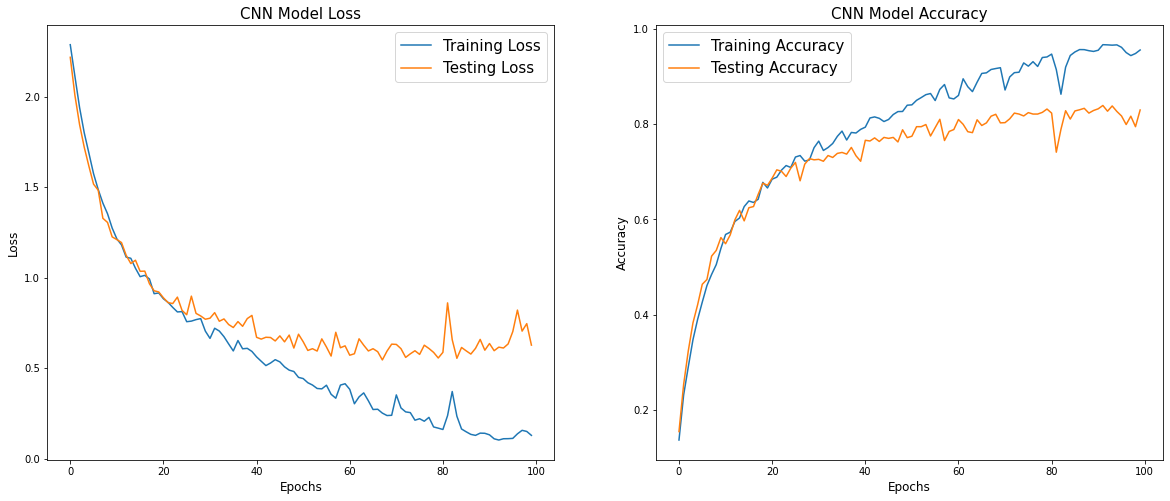

In [ ]:
# Graph Loss and Accuracy

train_loss = model_history.history['loss']
test_loss = model_history.history['val_loss']

train_acc = model_history.history['acc']
test_acc = model_history.history['val_acc']


plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.xlabel(xlabel='Epochs', fontsize=12)
plt.ylabel(ylabel='Loss', fontsize=12)
plt.title('CNN Model Loss', fontsize=15)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.xlabel(xlabel='Epochs', fontsize=12)
plt.ylabel(ylabel='Accuracy', fontsize=12)
plt.title('CNN Model Accuracy', fontsize=15)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.legend(fontsize=15);

Without any regularization, CNN model is definitely overfit. You can start to see the divergence between training and testing loss and accuracy starting around 20 epochs.

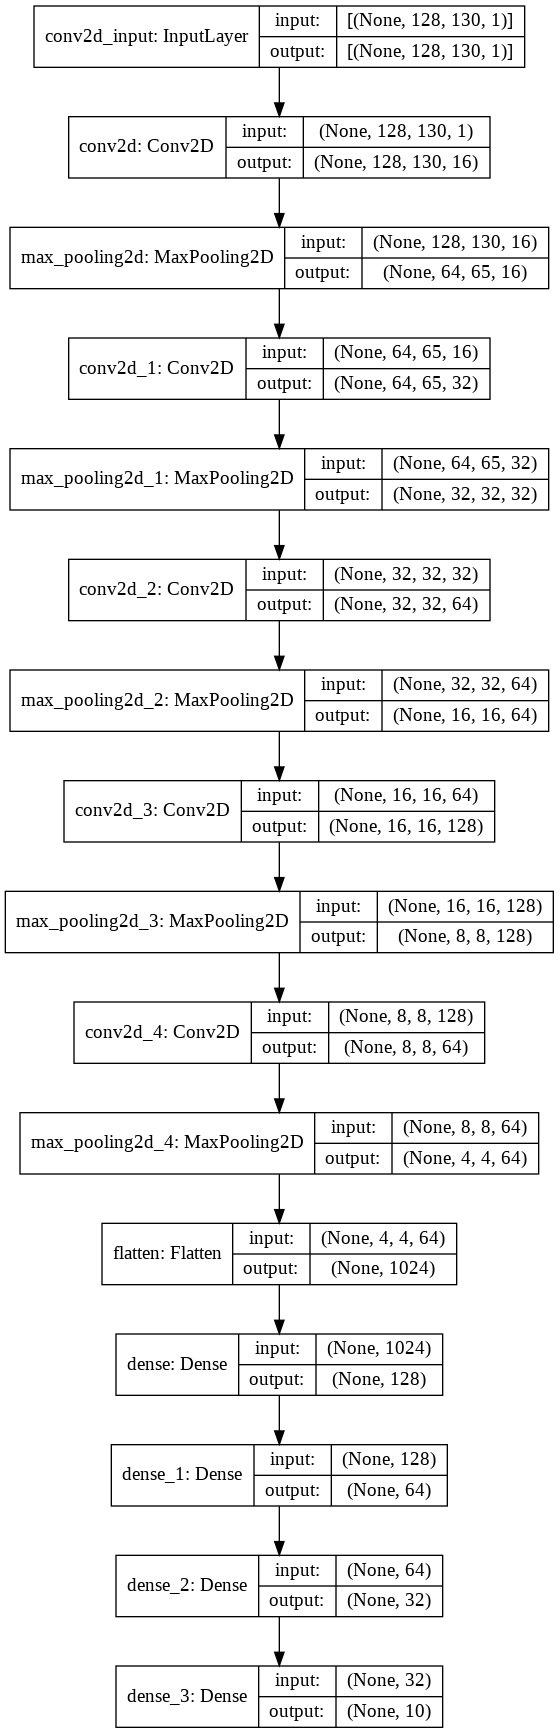

In [ ]:
plot_model(cnn_model, show_layer_names=True, show_shapes=True)

# Convolutional Neural Networks with Dropouts

In [ ]:
# Structure

# Instantiate
cnn_model_dropout = Sequential()

# Conv layer
cnn_model_dropout.add(Conv2D(filters=16,
                     kernel_size=(3, 3),
                     padding='same',
                     activation='relu',
                     input_shape=(128, 130, 1)))

# Max pooling
cnn_model_dropout.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model_dropout.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))

# Max pooling
cnn_model_dropout.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model_dropout.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))

# Max pooling
cnn_model_dropout.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model_dropout.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))

# Max pooling
cnn_model_dropout.add(MaxPooling2D(pool_size=(2,2)))

# Conv layer
cnn_model_dropout.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu'))

# Max pooling
cnn_model_dropout.add(MaxPooling2D(pool_size=(2,2)))


# Flatten
cnn_model_dropout.add(Flatten())

# Dense
cnn_model_dropout.add(Dense(128, activation='relu'))
cnn_model_dropout.add(Dropout(0.2))

cnn_model_dropout.add(Dense(64, activation='relu'))
cnn_model_dropout.add(Dropout(0.2))

cnn_model_dropout.add(Dense(32, activation='relu'))
cnn_model_dropout.add(Dropout(0.2))

# Outer layer
cnn_model_dropout.add(Dense(10, activation='softmax'))

# Compile
cnn_model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit
model_dropout_history = cnn_model_dropout.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/100
16/16 [==============================] - 3s 167ms/step - loss: 2.2996 - acc: 0.0964 - val_loss: 2.2551 - val_acc: 0.1000
Epoch 2/100
16/16 [==============================] - 2s 147ms/step - loss: 2.2377 - acc: 0.1465 - val_loss: 2.1322 - val_acc: 0.2200
Epoch 3/100
16/16 [==============================] - 2s 144ms/step - loss: 2.1183 - acc: 0.2210 - val_loss: 1.9193 - val_acc: 0.3265
Epoch 4/100
16/16 [==============================] - 2s 147ms/step - loss: 1.9729 - acc: 0.2695 - val_loss: 1.7470 - val_acc: 0.3700
Epoch 5/100
16/16 [==============================] - 2s 146ms/step - loss: 1.8399 - acc: 0.3267 - val_loss: 1.6479 - val_acc: 0.4165
Epoch 6/100
16/16 [==============================] - 2s 149ms/step - loss: 1.7641 - acc: 0.3499 - val_loss: 1.5704 - val_acc: 0.4310
Epoch 7/100
16/16 [==============================] - 2s 148ms/step - loss: 1.6704 - acc: 0.3858 - val_loss: 1.4612 - val_acc: 0.4690
Epoch 8/100
16/16 [==============================] - 2s 148ms/step - 

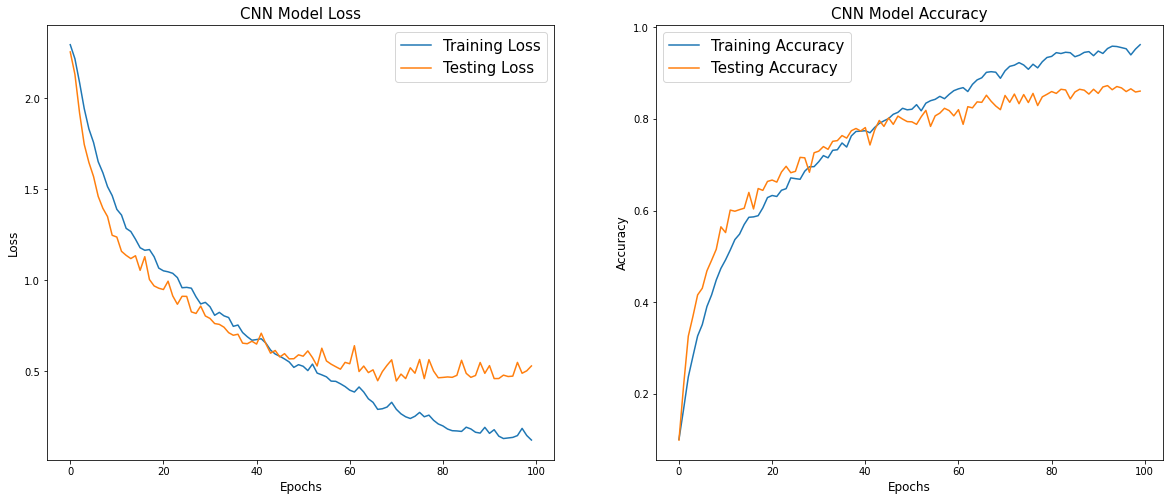

In [ ]:
# Graph Loss and Accuracy

train_loss_dropout = model_dropout_history.history['loss']
test_loss_dropout = model_dropout_history.history['val_loss']

train_acc_dropout = model_dropout_history.history['acc']
test_acc_dropout = model_dropout_history.history['val_acc']


plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.xlabel(xlabel='Epochs', fontsize=12)
plt.ylabel(ylabel='Loss', fontsize=12)
plt.title('CNN Model Loss', fontsize=15)
plt.plot(train_loss_dropout, label='Training Loss')
plt.plot(test_loss_dropout, label='Testing Loss')
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.xlabel(xlabel='Epochs', fontsize=12)
plt.ylabel(ylabel='Accuracy', fontsize=12)
plt.title('CNN Model Accuracy', fontsize=15)
plt.plot(train_acc_dropout, label='Training Accuracy')
plt.plot(test_acc_dropout, label='Testing Accuracy')
plt.legend(fontsize=15);

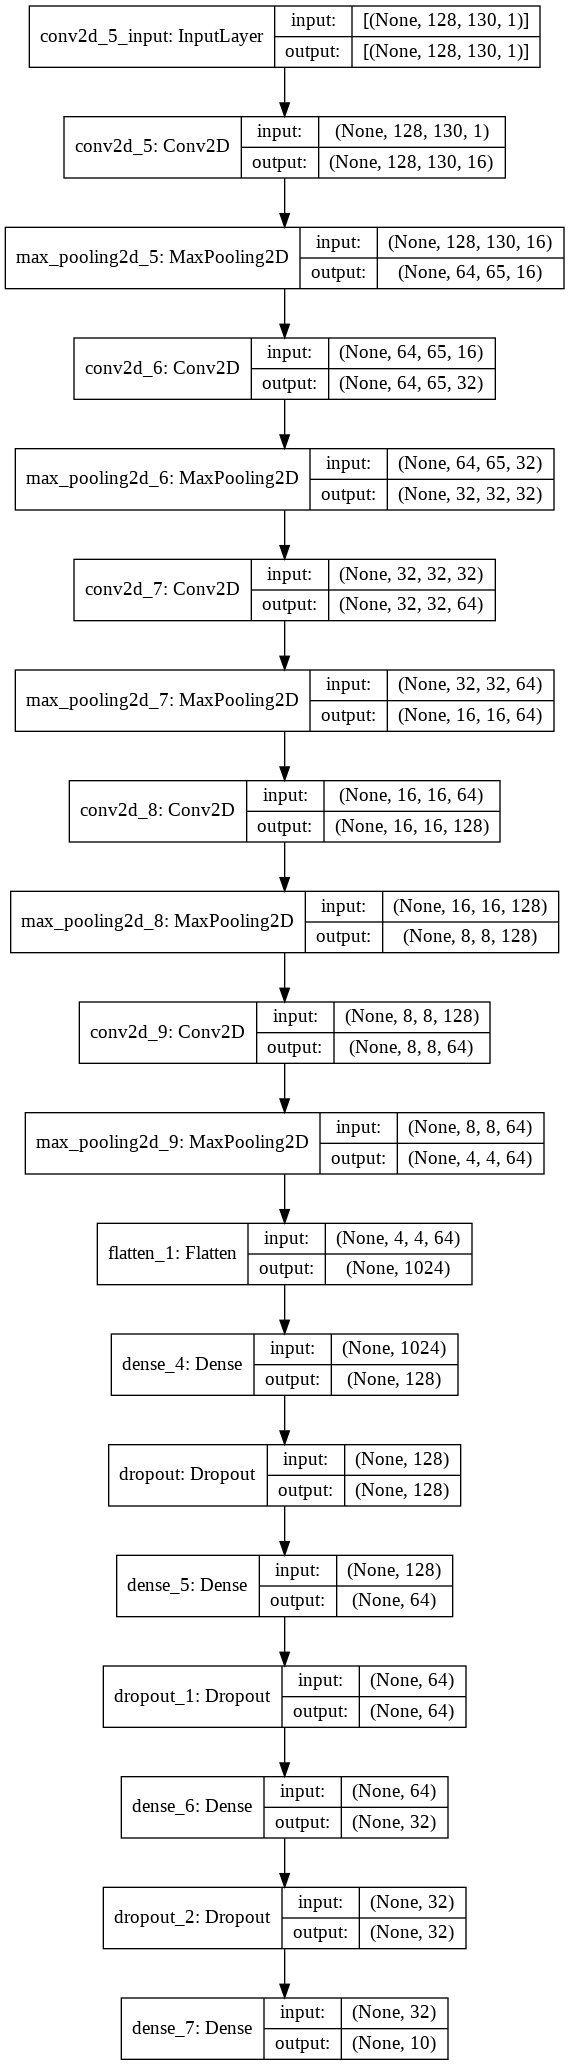

In [ ]:
plot_model(cnn_model_dropout, show_layer_names=True, show_shapes=True)

In [ ]:
# Saving models (architecture, weights, and training config)
cnn_model.save('/content/gdrive/MyDrive/Music-Genre-Project/Models/cnn_model')
cnn_model_dropout.save('/content/gdrive/MyDrive/Music-Genre-Project/Models/cnn_model_dropout')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Music-Genre-Project/Models/cnn_model/assets
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Music-Genre-Project/Models/cnn_model_dropout/assets
